<div style="max-width:66ch;">

# Scikit-learn exercises 

These are introductory exercises in Machine learning with focus in **scikit-learn** and **linear regression**.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

</div>

<div style="max-width:66ch;">

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop.

</div>


In [82]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = sns.load_dataset("mpg", cache=True, data_home=None)

#sns.get_dataset_names()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [83]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Check data types
data_types = df.dtypes

# Display the findings
print("Missing Values:\n", missing_values)
print("\nNumber of Duplicate Rows:", duplicate_rows)
print("\nData Types:\n", data_types)

Missing Values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Number of Duplicate Rows: 0

Data Types:
 mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


In [84]:
df.info() # horsepower 392 rest 398

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [85]:
horsepower_mean = df['horsepower'].mean() # Medelvärdet på horsepower
horsepower_mean

104.46938775510205

In [86]:
df['horsepower'] = df['horsepower'].fillna(horsepower_mean) # lägger in medelvärdet på saknade värden i horsepower kolumnen

In [87]:
print(df['horsepower'].isnull().sum()) # kontrollerar om det finns några NaN i horsepower

0


In [88]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [89]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, name]
Index: []


In [90]:
#B)
df[['mpg', 'cylinders', 'horsepower', 'weight', 'displacement', 'acceleration']].describe()

,mpg,cylinders,horsepower,weight,displacement,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,104.469388,2970.424623,193.425879,15.568090
std,7.815984,1.701004,38.199187,846.841774,104.269838,2.757689
min,9.000000,3.000000,46.000000,1613.000000,68.000000,8.000000
25%,17.500000,4.000000,76.000000,2223.750000,104.250000,13.825000
50%,23.000000,4.000000,95.000000,2803.500000,148.500000,15.500000
75%,29.000000,8.000000,125.000000,3608.000000,262.000000,17.175000
max,46.600000,8.000000,230.000000,5140.000000,455.000000,24.800000


In [91]:
df[df["horsepower"].isna()] # Checks missing values rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [92]:
df_mpg = df["mpg"]
df_mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

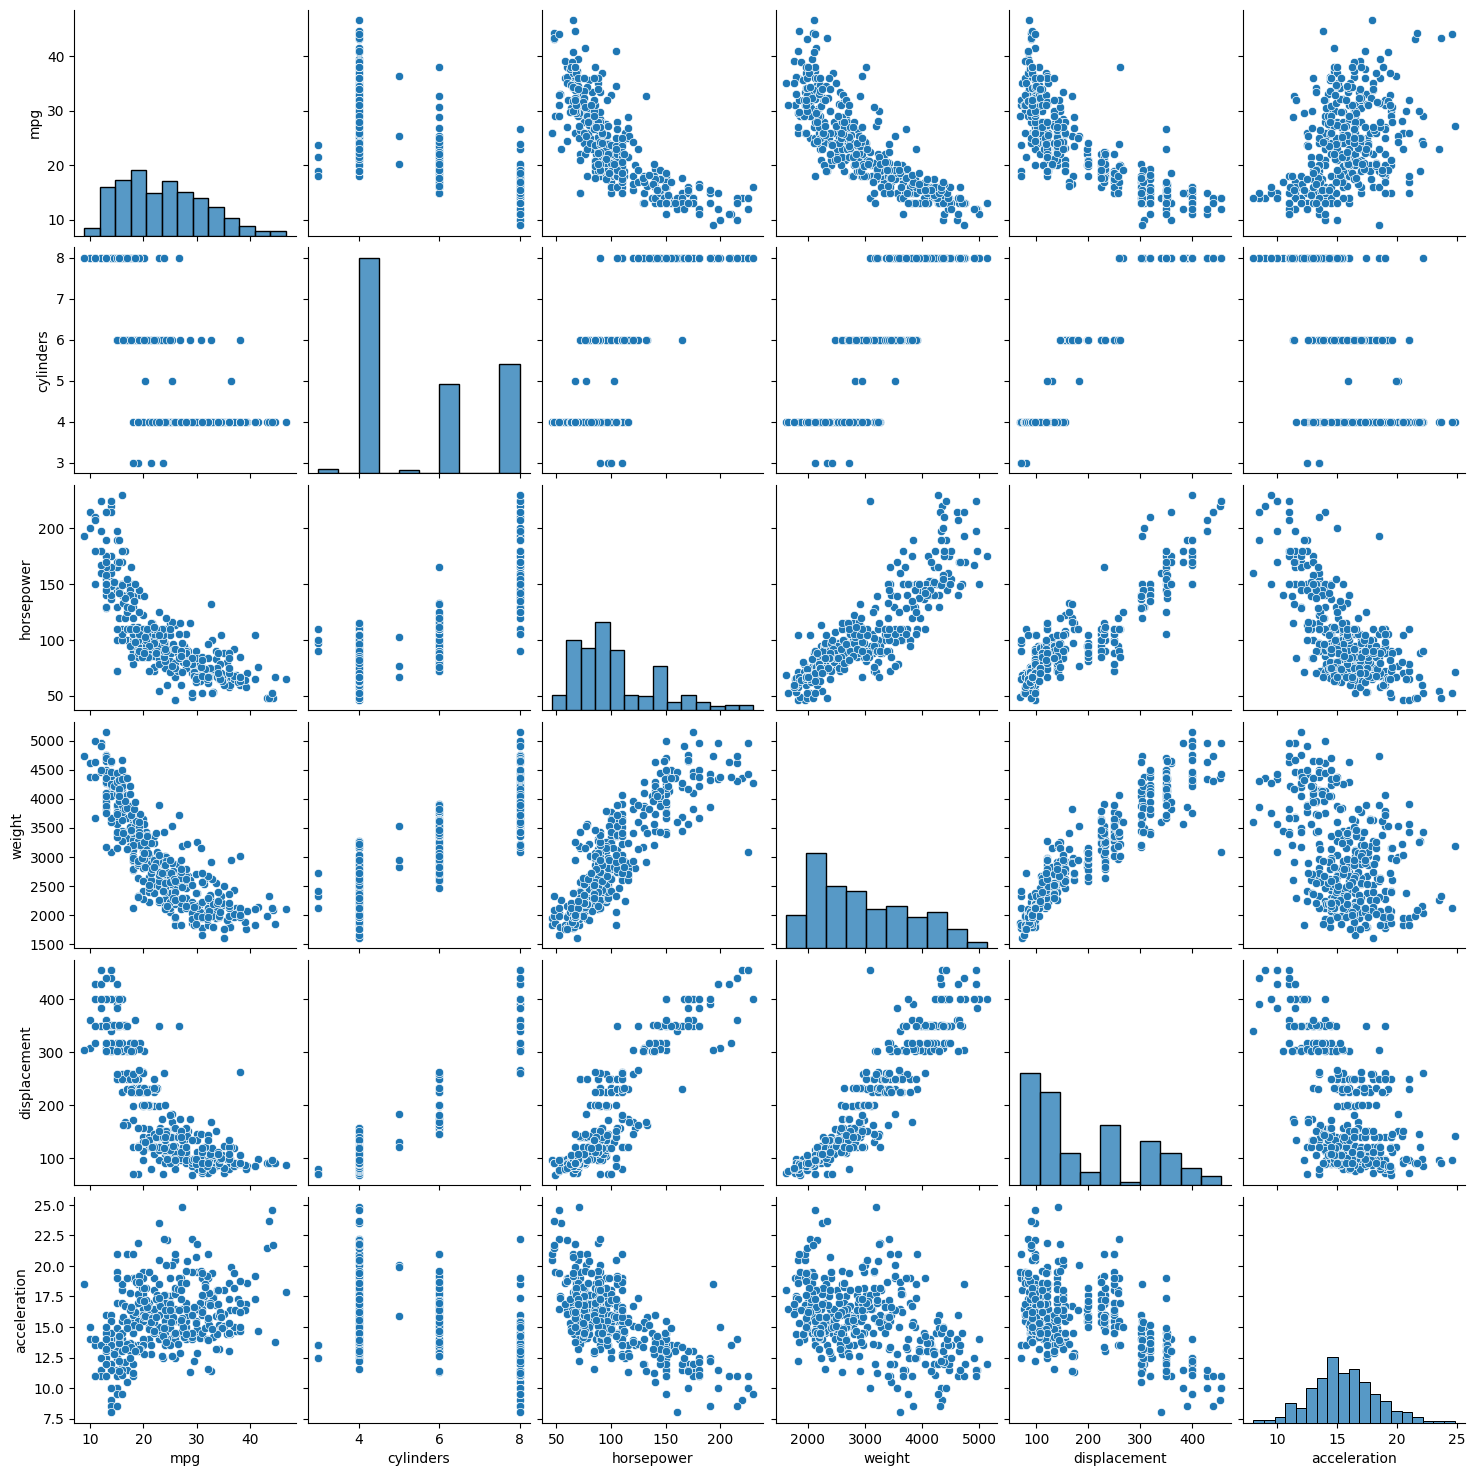

In [93]:
sns.pairplot(df[['mpg', 'cylinders', 'horsepower', 'weight', 'displacement', 'acceleration']])
plt.show()

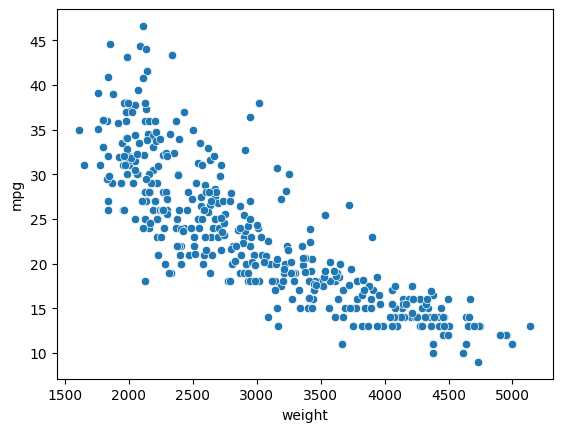

In [94]:
sns.scatterplot(x='weight', y='mpg', data=df)
plt.show()

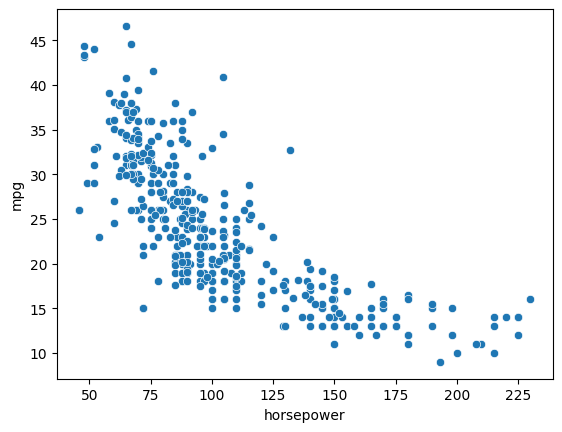

In [95]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.show()

In [96]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [97]:
df.drop('name', axis=1, inplace=True) # Droppar name kolumnen


In [98]:
df.drop('origin', axis=1, inplace=True) # Droppar origin kolumnen

In [99]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [100]:
df.shape

(398, 7)

<div style="max-width:66ch;">

---

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

</div>


X = df.drop("Sales", axis="columns"):

Detta tar en DataFrame df och tar bort kolumnen Sales från den.
Parametern axis="columns" anger att det är en kolumn som ska tas bort (jämfört med axis="rows", som skulle indikera en rad).
Resultatet lagras i en ny variabel X, som nu innehåller alla ursprungliga kolumner i df förutom Sales.
y = df["Sales"]:

Detta extraherar kolumnen Sales från DataFrame df och lagrar den i en ny variabel y.
Detta är vanligt när man förbereder data för maskininlärning, där y ofta representerar den variabel man försöker förutsäga eller modellera (beroende variabel), medan X innehåller de oberoende variablerna som används för att göra förutsägelserna.

In [101]:
X, y = df.drop("mpg", axis ="columns"), df["mpg"] # X innehåller alla ursprungliga kolumner utan mpg.
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [102]:
y # y innehåller mpg kolumnen # vektor av labels - variabeln som vi vill predicta svaren

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [103]:
df.shape

(398, 7)

In [104]:
## 1. train|test split

from sklearn.model_selection import train_test_split

# Denna kod delar upp datamängden i tränings- och testset. X och y är indelade så att 30% av datan blir testset (X_test, y_test) 
# och resterande 80% blir träningsset (X_train, y_train). Parametern random_state=42 säkerställer att uppdelningen är densamma varje gång koden körs.
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

In [105]:
# Check that it adds up to 398. 318+80 = 398

print(f"{X_train.shape =}")
print(f"{y_train.shape =}")
print(f"{X_test.shape =}")
print(f"{y_test.shape =}")

X_train.shape =(318, 6)
y_train.shape =(318,)
X_test.shape =(80, 6)
y_test.shape =(80,)


In [106]:
X_train.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year
3,8,304.0,150.0,3433,12.0,70
18,4,97.0,88.0,2130,14.5,70
376,4,91.0,68.0,2025,18.2,82
248,4,91.0,60.0,1800,16.4,78
177,4,115.0,95.0,2694,15.0,75
63,8,400.0,175.0,4385,12.0,72
246,4,78.0,52.0,1985,19.4,78
352,4,98.0,65.0,2380,20.7,81
108,4,97.0,88.0,2279,19.0,73
90,8,429.0,198.0,4952,11.5,73


In [107]:
# 2 Feature scaling

from sklearn.preprocessing import MinMaxScaler

# instansierar en scaler instans från klassen minmaxScaler
scaler = MinMaxScaler()
# hittar min och max från x_train och sparar dom
scaler.fit(X_train)
scaler


MinMaxScaler()

In [108]:
scaler.fit(X_train)
# använder min och max från x_train för att 
# transformera x_train -> scale x_train
scaled_X_train = scaler.transform(X_train)
# transformerar x_train -> scale x_test
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.shape = }")
print(f"{scaled_X_train.min() = }")
print(f"{scaled_X_train.max() = }")

scaled_X_train.shape = (318, 6)
scaled_X_train.min() = 0.0
scaled_X_train.max() = 1.0


In [109]:
print(f"{scaled_X_test.shape = }")
print(f"{scaled_X_test.min() = }")
print(f"{scaled_X_test.max() = }")

scaled_X_test.shape = (80, 6)
scaled_X_test.min() = 0.0
scaled_X_test.max() = 1.0279329608938548


In [110]:
# 3. Fit algorithm (Linear regression) for training data

from sklearn.linear_model import LinearRegression

# instansierar en model instans från linearregression klassen
model = LinearRegression()
# trains the model based on scaled_x_train
# it finds parameter that defines a plane that minimizes the total error between the points and the plane
model.fit(scaled_X_train, y_train)
print(f"{model.intercept_ =}") # Vart den skär y-axeln
print(f"{model.coef_ =}") # koeffisienten av features

model.intercept_ =27.129320861862876
model.coef_ =array([  0.34563765,   0.62601748,   0.49112609, -24.83182409,
         1.34163692,   9.61385674])


In [111]:
scaled_X_test[0]

array([0.2       , 0.05943152, 0.03910615, 0.05160193, 0.55952381,
       0.5       ])

In [112]:
test_sample_features = scaled_X_test[0]

test_sample_label = y_test.values[0]

print(f"{test_sample_features =}")
print(f"{test_sample_label =}")

test_sample_features =array([0.2       , 0.05943152, 0.03910615, 0.05160193, 0.55952381,
       0.5       ])
test_sample_label =33.0


In [113]:
model.predict(test_sample_features.reshape(1,-1)) # predict på 31.5 test sample på 33.0

array([31.53109579])

In [114]:
# 4. predict on test data

y_pred = model.predict(scaled_X_test)
y_pred

array([31.53109579, 30.70849255, 21.76226   , 17.00367581, 12.6130019 ,
       26.21298858, 28.91110402,  9.203019  , 17.21958478, 22.74890141,
       12.68127025, 34.98788977, 26.69305024, 14.05845246, 24.77721826,
        5.90349606, 30.87237625, 23.812746  , 15.88074362, 35.1630653 ,
       23.44503249, 19.69097766, 29.32850815, 30.33475799, 15.09790363,
       34.56140773, 25.77970744, 25.76026735, 22.17155643,  7.92248019,
       29.35879131, 34.94809283, 20.00733969, 24.92500913, 33.10362116,
       12.27718714, 24.47963851, 22.19709231, 12.37774229, 26.9653782 ,
       27.64455572, 27.40742955, 20.29321008,  7.75458288, 23.2567278 ,
       33.67959269, 26.58280382, 24.46965565, 22.78493184, 27.69250537,
       23.46866786, 32.51641698, 31.29673875, 10.59203038, 29.0331764 ,
        9.37415973, 19.459108  , 28.30596417, 24.25237835, 20.74590348,
       16.50177291, 30.73792699, 24.91739479, 20.29843339, 21.63449641,
       24.35609011, 25.87130899, 33.72516256, 29.33902158, 12.67

In [115]:
y_test.to_numpy()

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. ])

In [116]:
# 5. Evaluate performance

from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE mäter den genomsnittliga absoluta skillnaden mellan de faktiska värdena och de förutsagda värdena. Det ger en idé om hur stora fel du kan förvänta dig i modellens förutsägelser, men utan att ange riktningen på felen.

# Tolkning: I genomsnitt är dina förutsagda värden ungefär 2.47 enheter från de faktiska värdena. Om vi antar att din beroende variabel är mpg (miles per gallon), betyder detta att din modells förutsägelser i genomsnitt avviker med cirka 2.47 mpg från de faktiska mpg-värdena.
mean_absolute_error(y_test, y_pred)


2.4672660534140265

In [117]:
# MSE är liknande MAE men kvadrerar skillnaderna innan de genomsnittligas. Detta ger större vikt åt större fel, vilket kan vara användbart när du vill straffa större avvikelser hårdare än mindre.

# Tolkning: MSE-värdet är större än MAE eftersom det kvadrerar felen. Ett MSE på cirka 9.44 innebär att de kvadrerade felen, när de genomsnittligas, ger detta värde. Det är svårare att tolka direkt jämfört med MAE eftersom det inte är i samma enheter som din beroende variabel.

mean_squared_error(y_test, y_pred)

9.441014238263563

In [118]:
#RMSE är kvadratroten av MSE och återför felet till samma enheter som din beroende variabel. Det ger en bättre uppfattning om modellens prestanda, särskilt jämfört med MAE, eftersom det, likt MSE, ger större vikt åt större fel.

# Tolkning: RMSE-värdet är lite högre än MAE, vilket indikerar att det finns vissa större fel som påverkar modellens prestanda. Ett RMSE på ungefär 3.07 innebär att, i genomsnitt, kan de förutsagda värdena avvika med cirka 3.07 
# mpg från de faktiska värdena. Detta mått är särskilt användbart för att bedöma storleken på felen i samma enheter som den beroende variabeln.


np.sqrt(mean_squared_error(y_test, y_pred))

3.0726233479330918

- Sammanfattning
Utvärderingsresultat tyder på att modellen gör rimligt bra förutsägelser, med en genomsnittlig absolut avvikelse på cirka 2.47 mpg och en genomsnittlig kvadratisk avvikelse på cirka 3.07 mpg från de faktiska värdena. Dessa resultat ger en grundläggande uppfattning om modellens noggrannhet och pekar på att modellen är ganska kapabel att förutsäga mpg baserat på de oberoende variablerna, men det finns fortfarande utrymme för förbättring, särskilt för att minska effekten av större fel.

<div style="max-width:66ch;">

---

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

</div>


In [119]:
# 2.)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [120]:
def train_eval_model(X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train) # Tränar modellen med träningsdatan X_train. model är en instans av LinearRegression klassen
    
    
    y_pred = model.predict(X_test) # Efter att modellen har tränats används den här raden för att göra förutsägelser på testdatan (X_test). y_pred innehåller modellens förutsagda värden baserat på de oberoende variablerna i X_test. 
    
    
    mae = mean_absolute_error(y_test, y_pred) # Genomsnittet av de absoluta skillnaderna mellan förutsagda och faktiska värden. Den ger en intuitiv förståelse av den genomsnittliga feletstorleken.
    mse = mean_squared_error(y_test, y_pred)  # Genomsnittet av de kvadrerade skillnaderna mellan förutsagda och faktiska värden. Att kvadrera felen prioriterar och straffar större fel hårdare än mindre fel
    rmse = np.sqrt(mse)                       # Kvadratroten av MSE. Detta omvandlar tillbaka värdena till de ursprungliga enheterna och ger en bättre uppfattning om felets storlek jämfört med MSE.
    
    # Dessa rader skriver ut värdena av MAE, MSE och RMSE med upp till 4 decimalers precision. Det ger en snabb överblick av modellens prestanda.
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mae, mse, rmse

In [121]:
lin_reg_model = LinearRegression() # skapar en ny instans av LinearRegression, som är en modell för linjär regression från scikit-learn. Modellen är ännu inte tränad; den är bara redo att användas.


mae, mse, rmse = train_eval_model(X_train, X_test, y_train, y_test, lin_reg_model) # anropar train_eval_model-funktionen med tränings- och testdata samt den otränade modellen som argument.

MAE: 2.4673
MSE: 9.4410
RMSE: 3.0726


<div style="max-width:66ch;">

---

## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

---
</div>



In [124]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

scaler = StandardScaler() # # Instansiera StandardScaler för att standardisera features genom att avlägsna medelvärdet och skala till enhetsvarians

# Skalar träningsdatan: Beräknar först medelvärde och standardavvikelse för varje feature i träningsdatan
# Därefter används dessa värden för att skala träningsdatan så att varje feature får medelvärde 0 och standardavvikelse 1
X_train_scaled = scaler.fit_transform(X_train) 

# Använder den "passade" skalaren (med parametrar beräknade från träningsdatan) för att skala testdatan
# Det säkerställer att testdatan transformeras på samma sätt som träningsdatan
X_test_scaled = scaler.transform(X_test)

print(f"{X_train_scaled.shape = }")
print(f"{X_train_scaled.min() = }")
print(f"{X_train_scaled.max() = }")

# X_train_scaled har dimensionerna (318, 6), vilket innebär att det finns 318 observationer och 6 features i träningsdatan efter skalning.
# Minsta värdet i de skalade träningsdatan är -2.769175935234671, och det största värdet är 3.320161589522566.


X_train_scaled.shape = (318, 6)
X_train_scaled.min() = -2.769175935234671
X_train_scaled.max() = 3.320161589522566


In [125]:
# Linjär regression (SVD)
lin_reg = LinearRegression()

# Linjär regression (SVD) med skalad data
lin_reg_scaled = LinearRegression()

# Stochastic Gradient Descent med skalad data
sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)) # Använder make_pipeline för att skapa en sekvens av transformationer och en slutlig estimator. I detta fall standardiseras data först med StandardScaler, följt av SGDRegressor som använder stokastisk gradientnedstigning för linjär regression. 
                                                                                 # max_iter och tol är hyperparametrar som styr antalet iterationer och toleransen för stoppkriteriet.



# Skapar tre separata pipelines för polynomisk linjär regression med olika grader (1, 2 och 3). 
# PolynomialFeatures används för att generera ett nytt feature-set av polynom upp till angiven grad baserat på de ursprungliga features.
poly1_reg = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
poly2_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly3_reg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())


# Lagrar modellerna och deras namn i listor för iterativ utvärdering. En tom lista metrics skapas för att spara utvärderingsmetrikerna för varje modell.
models = [lin_reg, lin_reg_scaled, sgd_reg, poly1_reg, poly2_reg, poly3_reg]
model_names = ['Linear Regression', 'Linear Regression Scaled', 'SGD', 'Poly Degree 1', 'Poly Degree 2', 'Poly Degree 3']
metrics = []

# Itererar över listorna models och model_names samtidigt. Om modellnamnet innehåller 'Scaled', används den skalade versionen av tränings- och testdata. Annars används originaldatan.
for model, name in zip(models, model_names):
    if 'Scaled' in name:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # För varje modell anropas funktionen train_eval_model med antingen original eller skalad data, 
    # tränings- och testlabels, samt modellen själv. Funktionen returnerar MAE, MSE och RMSE, som läggs till i listan metrics
    mae, mse, rmse = train_eval_model(X_tr, X_te, y_train, y_test, model)
    metrics.append([name, mae, mse, rmse])


MAE: 2.4673
MSE: 9.4410
RMSE: 3.0726
MAE: 2.4673
MSE: 9.4410
RMSE: 3.0726
MAE: 2.4589
MSE: 9.5267
RMSE: 3.0865
MAE: 2.4673
MSE: 9.4410
RMSE: 3.0726
MAE: 1.9630
MSE: 7.2119
RMSE: 2.6855
MAE: 2.2503
MSE: 11.3885
RMSE: 3.3747


In [126]:
results_df = pd.DataFrame(metrics, columns=['Model', 'MAE', 'MSE', 'RMSE']) # Skapa en DataFrame från metrics-listan, Kolumnerna namnges enligt argumentet columns=, vilket ger en tydlig struktur och gör datan lätt att förstå.
print(results_df)


                      Model       MAE        MSE      RMSE
0         Linear Regression  2.467266   9.441014  3.072623
1  Linear Regression Scaled  2.467266   9.441014  3.072623
2                       SGD  2.458940   9.526726  3.086540
3             Poly Degree 1  2.467266   9.441014  3.072623
4             Poly Degree 2  1.962990   7.211854  2.685490
5             Poly Degree 3  2.250322  11.388481  3.374682


<div style="max-width:66ch;">


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

</div>


<div style="width: 66ch;">


</div>

<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>